In [ ]:
pip install pandas matplotlib tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
data = pd.read_csv("Tweets.csv")

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
review_data = data[['text','airline_sentiment']]
print(review_data.shape)
review_data.head(10)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [ ]:
review_data = review_data[review_data['airline_sentiment'] != 'neutral']
print(review_data.shape)        
review_data.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
review_data["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = review_data.airline_sentiment.factorize()  #0 represents positive sentiment and the 1 represents negative sentiment.
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = review_data.text.values

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)

tokenizer.fit_on_texts(tweet)

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padsequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
vocab_size=13250
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           424000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,651
Trainable params: 440,651
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(padsequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 87s 300ms/step - loss: 0.0333 - accuracy: 0.9874 - val_loss: 0.3613 - val_accuracy: 0.9359
Epoch 2/5
289/289 [==============================] - 83s 288ms/step - loss: 0.0310 - accuracy: 0.9882 - val_loss: 0.3865 - val_accuracy: 0.9350
Epoch 3/5
289/289 [==============================] - 84s 291ms/step - loss: 0.0331 - accuracy: 0.9883 - val_loss: 0.3537 - val_accuracy: 0.9290
Epoch 4/5
289/289 [==============================] - 86s 296ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.3355 - val_accuracy: 0.9264
Epoch 5/5
289/289 [==============================] - 83s 288ms/step - loss: 0.0330 - accuracy: 0.9875 - val_loss: 0.4063 - val_accuracy: 0.9294


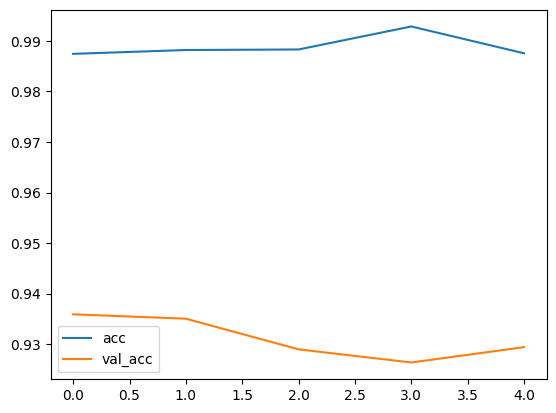

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

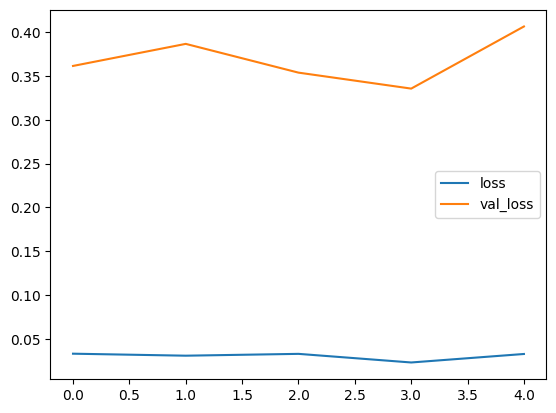

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [ ]:
test_sentence1 = input("Enter the FIRST sentence to TEST: ")
predict_sentiment(test_sentence1)

Enter the FIRST sentence to TEST: i did not like the flight journey
1/1 [==============================] - 0s 80ms/step
Predicted label:  negative


In [ ]:
test_sentence2 =input("Enter the SECOND sentence to TEST:")
predict_sentiment(test_sentence2)

Enter the SECOND sentence to TEST:services are not good
1/1 [==============================] - 0s 40ms/step
Predicted label:  negative
